python中的并发是伪并发，在某个时刻，只允许一个操作发生，但是线程/任务会互相切换，直到完成。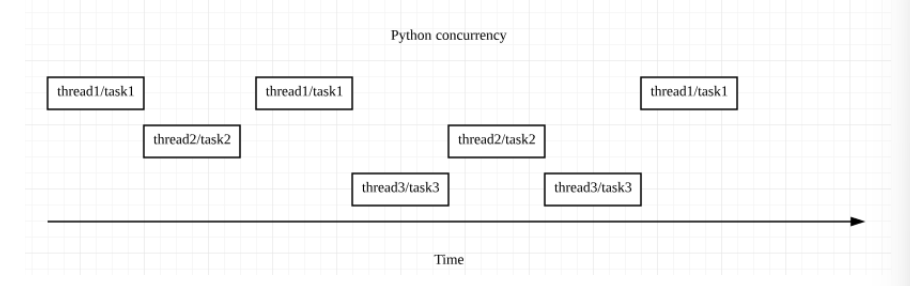

对于 threading，操作系统知道每个线程的所有信息，因此它会做主在适当的时候做线程切换。很显然，这样的好处是代码容易书写，因为程序员不需要做任何切换操作的处理；但是切换线程的操作，也有可能出现在一个语句执行的过程中（比如 x += 1），这样就容易出现 race condition 的情况。<br/>而对于 asyncio，主程序想要切换任务时，必须得到此任务可以被切换的通知，这样一来也就可以避免刚刚提到的 race condition 的情况。

python中的并行是指同一时刻，同时发生的进程并行。比如电脑是 6 核处理器，那么在运行程序时，就可以强制 Python 开 6 个进程，同时执行，以加快运行速度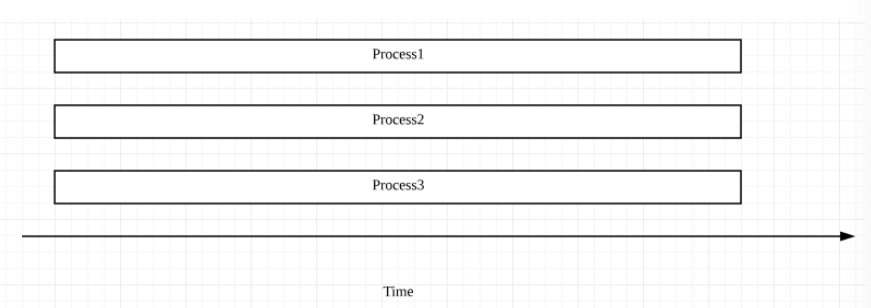

**应用场景**<br/>并发通常应用于 I/O 操作频繁的场景，比如你要从网站上下载多个文件，I/O 操作的时间可能会比 CPU 运行处理的时间长得多。<br/>而并行则更多应用于 CPU heavy 的场景，比如 MapReduce 中的并行计算，为了加快运行速度，一般会用多台机器、多个处理器来完成。

## 并发编程：Futures

**单线程与多线程性能比较：**

case1：用单线程的方式，下载一些网站的内容并打印

In [4]:
import requests
import time
 
def download_one(url):
    resp = requests.get(url)
    print('Read {} from {}'.format(len(resp.content), url))
    
def download_all(sites):
    for site in sites:
        download_one(site)
 
def main():
    sites = [
        'https://en.wikipedia.org/wiki/Portal:Arts',
        'https://en.wikipedia.org/wiki/Portal:History',
        'https://en.wikipedia.org/wiki/Portal:Society',
        'https://en.wikipedia.org/wiki/Portal:Biography',
        'https://en.wikipedia.org/wiki/Portal:Mathematics',
        'https://en.wikipedia.org/wiki/Portal:Technology',
        'https://en.wikipedia.org/wiki/Portal:Geography',
        'https://en.wikipedia.org/wiki/Portal:Science',
        'https://en.wikipedia.org/wiki/Computer_science',
        'https://en.wikipedia.org/wiki/Python_(programming_language)',
        'https://en.wikipedia.org/wiki/Java_(programming_language)',
        'https://en.wikipedia.org/wiki/PHP',
        'https://en.wikipedia.org/wiki/Node.js',
        'https://en.wikipedia.org/wiki/The_C_Programming_Language',
        'https://en.wikipedia.org/wiki/Go_(programming_language)'
    ]
    start_time = time.perf_counter()
    download_all(sites)
    end_time = time.perf_counter()
    print('Download {} sites in {} seconds'.format(len(sites), end_time - start_time))
    
if __name__ == '__main__':
    main()

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None))